# Case Study - Email Spam and Ham
- **Spam** -> Fraud messages, unnecessary messages, promotional mails.....etc
- **Ham** -> Opposite to spam, Necessary mails.
### Bussiness Problem:
- Malware, Phishing mails, Sorting time, Privacy issue to avoid all this we implement ml model.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\91830\Downloads\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Category'>

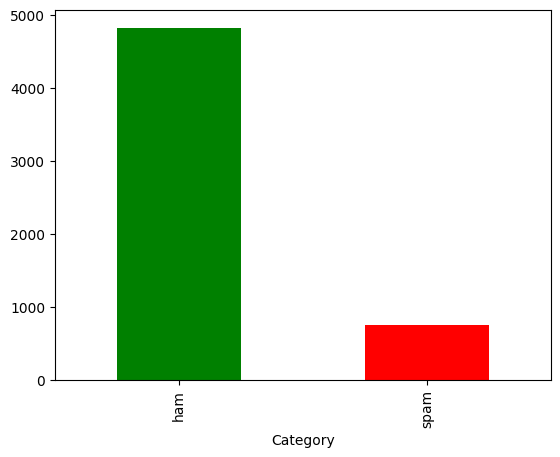

In [3]:
df["Category"].value_counts().plot(kind = 'bar',color = ['green','red'])

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

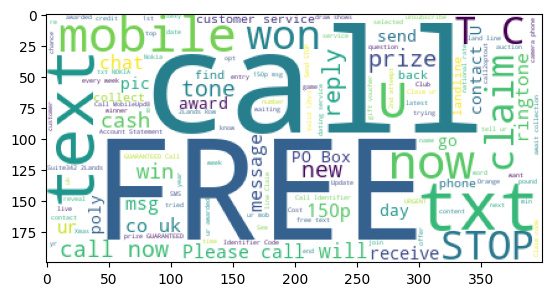

In [5]:
spam_email = df[df['Category'] == 'spam']['Message']
spam_words = ''.join(spam_email.values)
cloud = WordCloud(background_color='white').generate(spam_words)
plt.imshow(cloud)

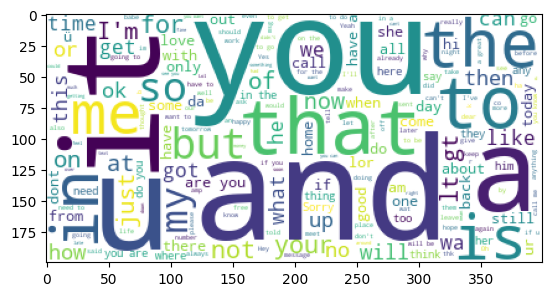

In [6]:
ham_email = df[df['Category'] == 'ham']['Message']
ham_words = ''.join(ham_email.values)
cloud = WordCloud(background_color='white',stopwords='english').generate(ham_words)
plt.imshow(cloud)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
tf = CountVectorizer(stop_words='english')

In [9]:
X = df.drop('Category',axis=1)
y = df['Category']

In [14]:
X

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = pd.DataFrame(tf.fit_transform(X['Message']).toarray(),columns = tf.get_feature_names_out())

In [11]:
X

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=23,test_size = 0.2)

## KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

## NAive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

## DecisionTreeClassifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9668161434977578

## RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9730941704035875

## SVM

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9775784753363229

## Testing

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
email = input("Enter the email to test: ")
data = tf.transform([email]).toarray()
nb.predict(data)[0]

In [ ]:
def mail_tester(email):
    data = tf.transform([email]).toarray()
    return nb.predict(data)[0] 

In [ ]:
mail_tester("wow..congraculations..You won lottery")

### For testing a entire data at once

In [ ]:
df = pd.read_csv(r"C:\Users\91830\Downloads\emails (1).csv")

In [ ]:
df["result"] = df['Email'].apply(mail_tester)

In [ ]:
df